**Name: Christ-Brian Amedjonekou**  
**Date: 4/08/2019**  
**TCET 3102-E316 (Analog and Digital Communications) Lab 3**  
**Spring 2019, Section: E316, Code: 37251**  
**Instructor: Song Tang**

### Objective

* Design a low pass elliptic filter to receive desired output (filtered signal), where the input will be a square wave signal.

### Equipment 

* Computer Software

### Theory

* The subscriber loop is the most critical component of a telephone network. They're created through the use of two copper wires.


* We can created an equivalent circuit for the subscriber loop through the use of a low pass filter. The bandwidth of this filter can be calculated w/ the following formula: $$\space$$ $$\omega_c = \frac{1}{RC} = 0.707$$  $$\space$$ 


* $0.707$ is the maximum magnitude and the cuttoff frequency


* For telephone networks, the bandwidth of the of subscriber loop is enough to support signal transmissions of the range **0 - 4 kHZ**. Also, to further improve quality of transmissions, designers use loading coils to flatten attuentuation-frequency characters of the loop. This was how telephone networks used to function.


* A problem arises, however, with the arrival of the digital era. Since digital signals are pulse waveforms they have a spectrum much larger that the range mentioned above. The objective of our experiment is determine the reponse of digital signals through the subscriber loops.

### Modules (Packages)

In [1]:
# These are the packages I'll need to solve this problem
import math as m
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import ellip, freqz, lfilter

### Variables for time domain plot

In [2]:
def ffs_(omega, t, A):
    s = np.sin(omega*t)
    for i in range(3, 30, 2):
        s = s + 1/i * np.sin(i*omega*t)
    s = A/2 + (2*A)/np.pi * s
    return s

In [3]:
# These variables are used to create the fourier series
# Start and Stop indicates my domain for my sampling frequency [samplingfreq; (F_S)]
# 100 points.
# n1, n2 are the amount of harmonics I want.
start, stop, n, samplingfreq = 1, 101, 15, 100 

# 't' is for time, and is used to create my 100 Hz time vector
t = np.arange(start, stop, .001) / samplingfreq

# 'A' represents the amplitude 2 volts
A = 2

# 'fundamental' is the DC component of the Fourier Series 
fundamental = A/2

# 'signalfreq' is the Signal Frequency (f_0)
signalfreq = 1 

# 'omega' is the Angular Velocity (w_0)
omega = 2 * np.pi * signalfreq

# Lambda function 
template = lambda p: ((2*A)/(np.pi*(2*p+1))) * np.sin((2*p+1) * omega * t)

# harmonics1, harmonics2 are AC component of the Fourier series
harmonics = sum([template(p) for p in range(n+1)])

# ffs1, ffs2 are the fourier series
ffs = lambda n: (fundamental + harmonics)

### RUN 1: Synthesis Square Wave

* **Step 1: This is using the square wave from Lab 1**

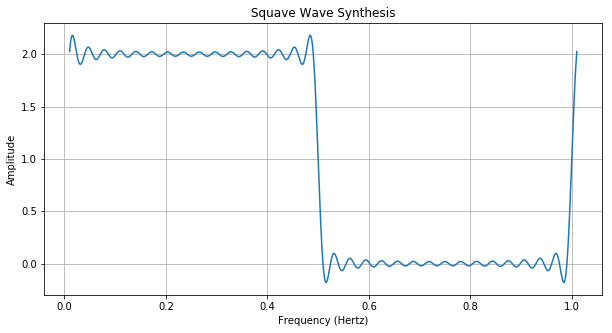

In [4]:
# Creates figure 1 and its subplot 
fig1, ax1 = plt.figure(figsize= (10,5)), plt.subplot()
ax1.plot(t, ffs(n))
ax1.set(xlabel= 'Frequency (Hertz)', ylabel= 'Amplitude', 
        title= 'Squave Wave Synthesis');
ax1.grid(True)

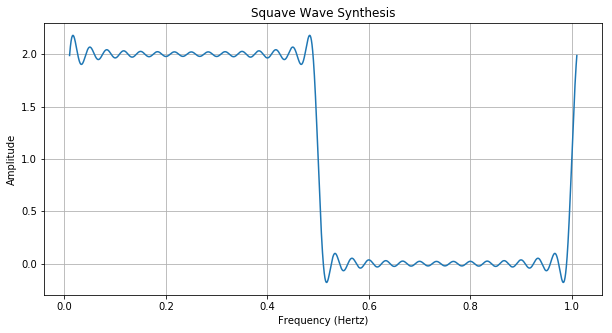

In [5]:
# Creates figure 2 and its subplot
# This here uses a different fourier series function. 
# I wanted to see if results later down the lab would be different
fig2, ax2 = plt.figure(figsize= (10,5)), plt.subplot()
ax2.plot(t, ffs_(omega, t, A))
ax2.set(xlabel= 'Frequency (Hertz)', ylabel= 'Amplitude', 
        title= 'Squave Wave Synthesis');
ax2.grid(True)

### RUN 2: Elliptic (Cauer) Filter Design

* **Step 1: Plot the Elliptic (Cauer) Filter**

/Users/Chris/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 1600)

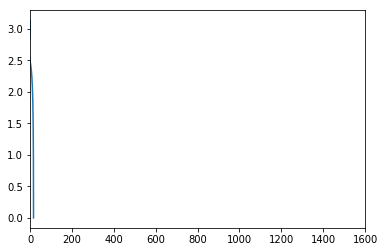

In [6]:
# Elliptical order, 'm'
m = 3

# Decibels of the ripple in passband, 'rP'
rP = 0.1

# Decibels of the ripple in stopband, 'rS'
rS = 40

# The Cutoff Filter Frequency, 'omega_N', normalized to Nyquist Frequency
# 'omega_N = 1' cooresponds to half the sampling frequency
# When the frequency equals to 'omega_N' the filter's magnitude response is
# equal to the ripple in passband, 'rP' (decibels)

omega_N = 0.8

# in-built scipy function for the Elliptic (Cauer) Filter 
b, a = ellip(m, rP, rS, omega_N)

# displays the magnitude and phase of the filter, normalized to Nyquist Frequency
H, omega = freqz(b, a)
xval = (omega * samplingfreq)/(2 * np.pi)
yval = abs(H)
plt.plot(xval, yval)
plt.xlim(0,1600)

### RUN 3: Filter Input Signals

* **Step 1: Observe the filtering effect in the time domain**

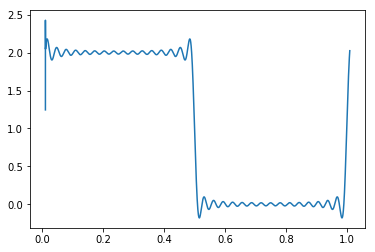

In [7]:
sf = lfilter(b, a, ffs(n))
plt.plot(t, sf)

* **Step 2: Observe the filtering effect in the frequency domain**

In [8]:
S = fft(ffs(n), 512)
SF = fft(sf, 512)
f = (np.arange(0, 256)/256)*(samplingfreq/2)

/Users/Chris/anaconda/lib/python3.6/site-packages/scipy/fftpack/basic.py:153: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[index]


In [9]:
ffs(n)[:11]

array([2.02527815, 2.025854  , 2.02642873, 2.02700233, 2.02757482,
       2.02814619, 2.02871643, 2.02928555, 2.02985355, 2.03042043,
       2.03098619])

### Lab Questions/Requirements

1. **Depict signals $2 \sin(628 \text{t})$ and $2 \cos(628 \text{t})$ both in the time domain and the frequency domain. In the frequency domain, show both axes with angular velocity $(\omega)$ and frequency $\big(f\big)$**